<a href="https://colab.research.google.com/github/jcieslik/WineQualityPrediction/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-gpu

In [20]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plot

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import normalize
from keras import Sequential

In [22]:
white = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
red = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white['type'] = 0
red['type'] = 1
data = red.append(white, ignore_index = True)
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3684,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,0.76,9.6,6,0
5124,5.3,0.36,0.27,6.30,0.028,40.0,132.0,0.99186,3.37,0.40,11.6,6,0
2803,5.0,0.33,0.16,1.50,0.049,10.0,97.0,0.99170,3.48,0.44,10.7,6,0
5332,6.5,0.19,0.34,1.60,0.029,39.0,116.0,0.98954,3.21,0.68,12.5,6,0
1652,6.4,0.18,0.35,1.00,0.045,39.0,108.0,0.99110,3.31,0.35,10.9,6,0
4116,7.3,0.51,0.29,11.30,0.034,61.0,224.0,0.99683,3.14,0.56,9.5,6,0
3995,8.4,0.30,0.25,17.75,0.047,25.0,218.0,1.00016,2.98,0.66,9.1,5,0
3719,6.8,0.25,0.27,10.70,0.076,47.0,154.0,0.99670,3.05,0.38,9.0,5,0
2082,6.7,0.47,0.34,8.90,0.043,31.0,172.0,0.99640,3.22,0.60,9.2,5,0
2256,7.3,0.34,0.21,3.20,0.050,14.0,136.0,0.99360,3.25,0.44,10.2,5,0


In [23]:
data.update(data.fillna(data.mean()))

In [24]:
train_dataset = data.sample(frac=0.85,random_state=0)
train_labels = train_dataset.pop('quality')
train_dataset_normalized = normalize(train_dataset)


In [25]:
test_dataset = data.drop(train_dataset.index)
test_labels = test_dataset.pop('quality')
test_dataset_normalized = normalize(test_dataset)


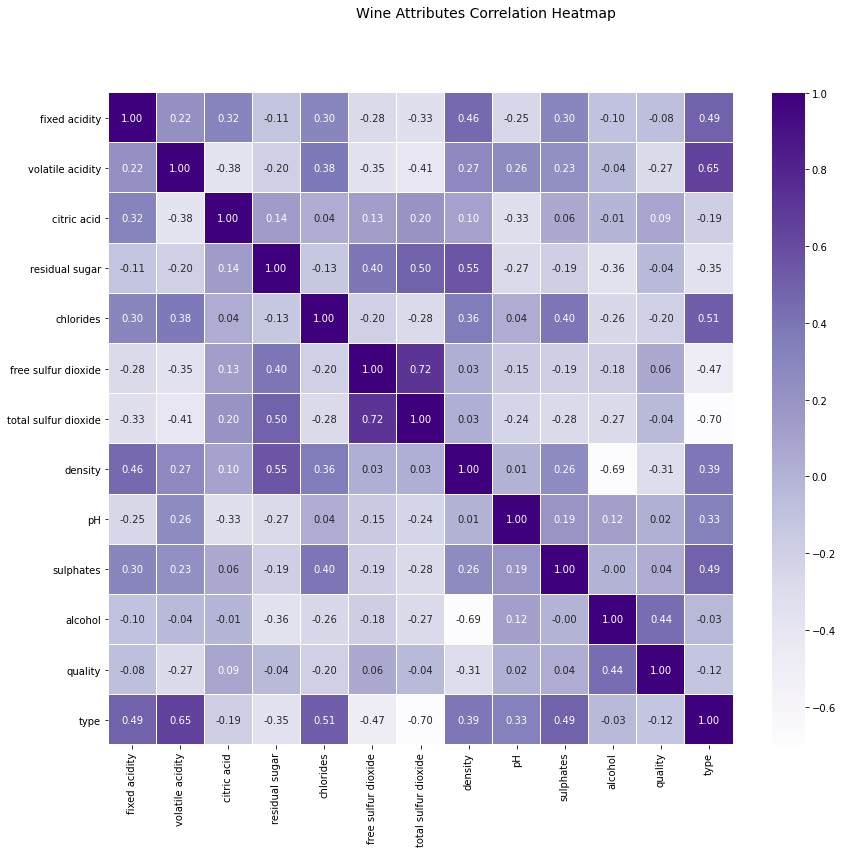

In [26]:
heatmap, ax = plot.subplots(figsize=(14, 12))
correlations = data.corr()
seaborn.heatmap(round(correlations,2), annot=True, ax=ax, cmap="Purples", 
             linewidths=.02, fmt='.2f')
_ = heatmap.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

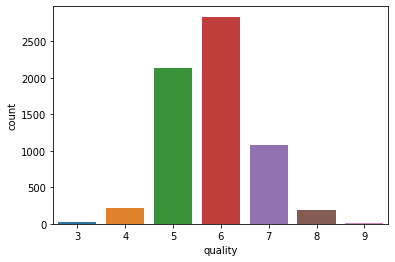

In [27]:
qualities = seaborn.countplot(x="quality", data=data)
plot.show(qualities)

In [28]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[12]),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [29]:
model = build_model()

In [ ]:
EPOCHS = 600

history = model.fit(
  train_dataset_normalized, train_labels,
  validation_split=0.2,
  epochs=EPOCHS, verbose=1)

In [31]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)

early_history = model.fit(train_dataset_normalized, train_labels, 
                    epochs=EPOCHS, verbose=1, 
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/600
139/139 [==============================] - 0s 3ms/step - loss: 0.4687 - mae: 0.5360 - mse: 0.4687 - val_loss: 0.4716 - val_mae: 0.5371 - val_mse: 0.4716
Epoch 2/600
139/139 [==============================] - 0s 3ms/step - loss: 0.4687 - mae: 0.5331 - mse: 0.4687 - val_loss: 0.4794 - val_mae: 0.5471 - val_mse: 0.4794
Epoch 3/600
139/139 [==============================] - 0s 3ms/step - loss: 0.4527 - mae: 0.5245 - mse: 0.4527 - val_loss: 0.4776 - val_mae: 0.5432 - val_mse: 0.4776
Epoch 4/600
139/139 [==============================] - 0s 3ms/step - loss: 0.4585 - mae: 0.5261 - mse: 0.4585 - val_loss: 0.4948 - val_mae: 0.5492 - val_mse: 0.4948
Epoch 5/600
139/139 [==============================] - 0s 3ms/step - loss: 0.4520 - mae: 0.5221 - mse: 0.4520 - val_loss: 0.4997 - val_mae: 0.5544 - val_mse: 0.4997
Epoch 6/600
139/139 [==============================] - 0s 3ms/step - loss: 0.4578 - mae: 0.5280 - mse: 0.4578 - val_loss: 0.4871 - val_mae: 0.5458 - val_mse: 0.4871
Epoch 7/60

In [32]:
loss, mae, mse = model.evaluate(test_dataset_normalized, test_labels, verbose=2)

31/31 - 0s - loss: 0.4949 - mae: 0.5516 - mse: 0.4949


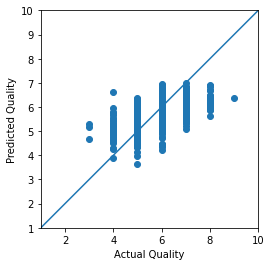

In [33]:
predictions = model.predict(test_dataset_normalized).flatten()

plot.axes(aspect='equal')
plot.xlabel('Actual Quality')
plot.ylabel('Predicted Quality')
plot.scatter(test_labels, predictions)
limits = [1, 10]
plot.xlim(limits)
plot.ylim(limits)
a = plot.plot(limits, limits)

In [34]:
predictions.mean()

5.7148223

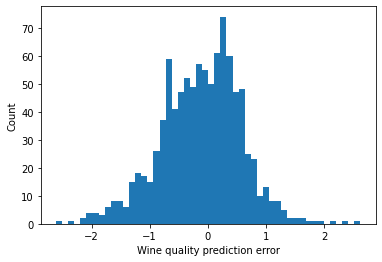

In [35]:
error = predictions - test_labels
plot.hist(error, bins = 50)
plot.xlabel("Wine quality prediction error")
_ = plot.ylabel("Count")

In [36]:
model.save('WinePredictionModel.h5')